Дипломная работа по курсу «Python для анализа данных»

1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

In [5]:
df=pd.read_csv('HR.csv')


In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
# добавим колонку с значениями 0,1,2 для уровней зараьотной платы (salary) 
# low - 0, medium -1, high - 2

df['new_salary'] = 0
for val in df['salary'].unique():
    df.loc[df['salary']==val,'new_salary'] =  list(df['salary'].unique()).index(val)

df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,new_salary
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [16]:
print('satisfaction_level:')
print('Матожидание: ',statistics.mean(df['satisfaction_level']))
print('Максимум: ',max(df['satisfaction_level']))
print('Минимум: ',min(df['satisfaction_level']))
print('размах: ',max(df['satisfaction_level'])-min(df['satisfaction_level']))
print('стандартное отклонение: ',statistics.pstdev(df['satisfaction_level']))
print('дисперсия: ',statistics.pvariance(df['satisfaction_level']))
print('Медиана: ', statistics.median(df['satisfaction_level']))
print('Значение моды: ', statistics.mode(df['satisfaction_level']))

satisfaction_level:
Матожидание:  0.6128335222348157
Максимум:  1.0
Минимум:  0.09
размах:  0.91
стандартное отклонение:  0.2486223626820733
дисперсия:  0.061813079225616394
Медиана:  0.64
Значение моды:  0.1


In [17]:
print('last_evaluation:')
print('Матожидание: ',statistics.mean(df['last_evaluation']))
print('Максимум: ',max(df['last_evaluation']))
print('Минимум: ',min(df['last_evaluation']))
print('размах: ',max(df['last_evaluation'])-min(df['last_evaluation']))
print('стандартное отклонение: ',statistics.pstdev(df['last_evaluation']))
print('дисперсия: ',statistics.pvariance(df['last_evaluation']))
print('Медиана: ', statistics.median(df['last_evaluation']))
print('Значение моды: ', statistics.mode(df['last_evaluation']))

last_evaluation:
Матожидание:  0.7161017401160077
Максимум:  1.0
Минимум:  0.36
размах:  0.64
стандартное отклонение:  0.1711634045107436
дисперсия:  0.029296911043708445
Медиана:  0.72
Значение моды:  0.55


In [18]:
print('number_project:')
print('Матожидание: ',statistics.mean(df['number_project']))
print('Максимум: ',max(df['number_project']))
print('Минимум: ',min(df['number_project']))
print('размах: ',max(df['number_project'])-min(df['number_project']))
print('стандартное отклонение: ',statistics.pstdev(df['number_project']))
print('дисперсия: ',statistics.pvariance(df['number_project']))
print('Медиана: ', statistics.median(df['number_project']))
print('Значение моды: ', statistics.mode(df['number_project']))

number_project:
Матожидание:  3.80305353690246
Максимум:  7
Минимум:  2
размах:  5
стандартное отклонение:  1.2325512654823438
дисперсия:  1.5191826220421274
Медиана:  4
Значение моды:  4


In [20]:
print('average_montly_hours:')
print('Матожидание: ',statistics.mean(df['average_montly_hours']))
print('Максимум: ',max(df['average_montly_hours']))
print('Минимум: ',min(df['average_montly_hours']))
print('размах: ',max(df['average_montly_hours'])-min(df['average_montly_hours']))
print('стандартное отклонение: ',statistics.pstdev(df['average_montly_hours']))
print('дисперсия: ',statistics.pvariance(df['average_montly_hours']))
print('Медиана: ', statistics.median(df['average_montly_hours']))
print('Значение моды: ', statistics.mode(df['average_montly_hours']))

average_montly_hours:
Матожидание:  201.0503366891126
Максимум:  310
Минимум:  96
размах:  214
стандартное отклонение:  49.94143446256218
дисперсия:  2494.146876178393
Медиана:  200


StatisticsError: no unique mode; found 2 equally common values

In [25]:
len(df.average_montly_hours)

14999

In [26]:
df.average_montly_hours.unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

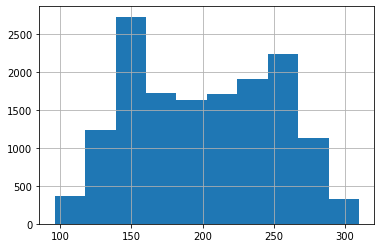

In [21]:
df['average_montly_hours'].hist()

In [27]:
print('time_spend_company:')
print('Матожидание: ',statistics.mean(df['time_spend_company']))
print('Максимум: ',max(df['time_spend_company']))
print('Минимум: ',min(df['time_spend_company']))
print('размах: ',max(df['time_spend_company'])-min(df['time_spend_company']))
print('стандартное отклонение: ',statistics.pstdev(df['time_spend_company']))
print('дисперсия: ',statistics.pvariance(df['time_spend_company']))
print('Медиана: ', statistics.median(df['time_spend_company']))
print('Значение моды: ', statistics.mode(df['time_spend_company']))

time_spend_company:
Матожидание:  3.498233215547703
Максимум:  10
Минимум:  2
размах:  8
стандартное отклонение:  1.4600875552715114
дисперсия:  2.1318556690587385
Медиана:  3
Значение моды:  3


In [28]:
print('Work_accident:')
print('Матожидание: ',statistics.mean(df['Work_accident']))
print('Максимум: ',max(df['Work_accident']))
print('Минимум: ',min(df['Work_accident']))
print('размах: ',max(df['Work_accident'])-min(df['Work_accident']))
print('стандартное отклонение: ',statistics.pstdev(df['Work_accident']))
print('дисперсия: ',statistics.pvariance(df['Work_accident']))
print('Медиана: ', statistics.median(df['Work_accident']))
print('Значение моды: ', statistics.mode(df['Work_accident']))

Work_accident:
Матожидание:  0.1446096406427095
Максимум:  1
Минимум:  0
размах:  1
стандартное отклонение:  0.3517068274513532
дисперсия:  0.12369769247589593
Медиана:  0
Значение моды:  0


In [29]:
print('left:')
print('Матожидание: ',statistics.mean(df['left']))
print('Максимум: ',max(df['left']))
print('Минимум: ',min(df['left']))
print('размах: ',max(df['left'])-min(df['left']))
print('стандартное отклонение: ',statistics.pstdev(df['left']))
print('дисперсия: ',statistics.pvariance(df['left']))
print('Медиана: ', statistics.median(df['left']))
print('Значение моды: ', statistics.mode(df['left']))

left:
Матожидание:  0.2380825388359224
Максимум:  1
Минимум:  0
размах:  1
стандартное отклонение:  0.42590990072709495
дисперсия:  0.1813992435373639
Медиана:  0
Значение моды:  0


In [30]:
print('promotion_last_5years:')
print('Матожидание: ',statistics.mean(df['promotion_last_5years']))
print('Максимум: ',max(df['promotion_last_5years']))
print('Минимум: ',min(df['promotion_last_5years']))
print('размах: ',max(df['promotion_last_5years'])-min(df['promotion_last_5years']))
print('стандартное отклонение: ',statistics.pstdev(df['promotion_last_5years']))
print('дисперсия: ',statistics.pvariance(df['promotion_last_5years']))
print('Медиана: ', statistics.median(df['promotion_last_5years']))
print('Значение моды: ', statistics.mode(df['promotion_last_5years']))

promotion_last_5years:
Матожидание:  0.021268084538969265
Максимум:  1
Минимум:  0
размах:  1
стандартное отклонение:  0.14427665479561314
дисперсия:  0.02081575311901252
Медиана:  0
Значение моды:  0


In [13]:
print('new_salary:')
print('Матожидание: ',statistics.mean(df['new_salary']))
print('Максимум: ',max(df['new_salary']))
print('Минимум: ',min(df['new_salary']))
print('размах: ',max(df['new_salary'])-min(df['new_salary']))
print('стандартное отклонение: ',statistics.pstdev(df['new_salary']))
print('дисперсия: ',statistics.pvariance(df['new_salary']))
print('Медиана: ', statistics.median(df['new_salary']))
print('Значение моды: ', statistics.mode(df['new_salary']))

new_salary:
Матожидание:  0.5947063137542503
Максимум:  2
Минимум:  0
размах:  2
стандартное отклонение:  0.6371617092677936
дисперсия:  0.4059750437570563
Медиана:  1
Значение моды:  0


3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [14]:
df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,new_salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
new_salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


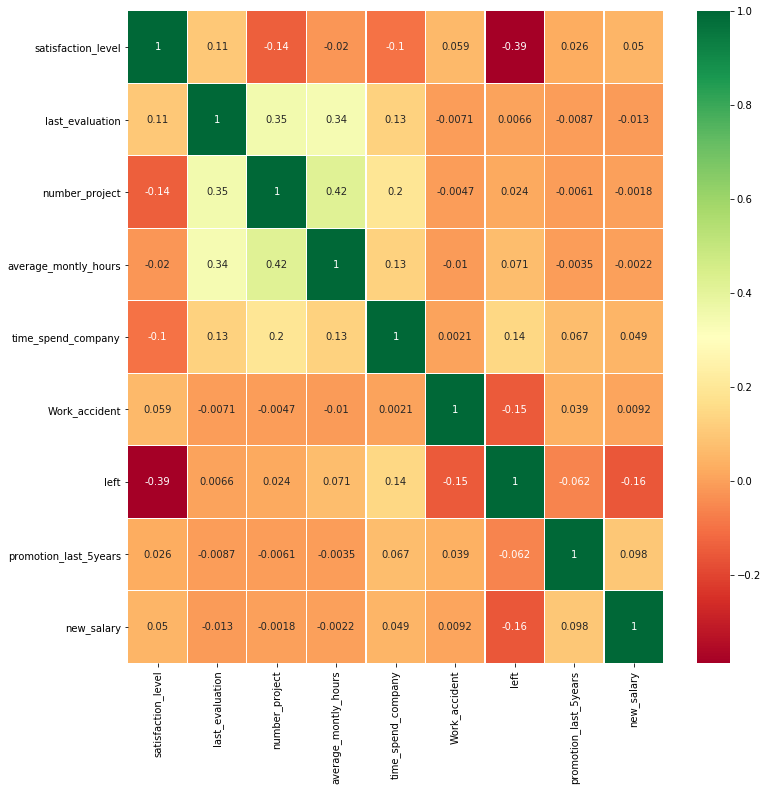

In [15]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

видно зависимости увольнений с временем работы в компании, заработной платы от повышений за последние 5 лет

In [16]:
df.sales.unique()   #посмотрим какие отделы (департаменты) есть в компании

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [17]:
df.number_project.unique() #смотрим, какие варианты есть по количеству проектов на сотрудника 

array([2, 5, 7, 6, 4, 3])

In [18]:
df.info()     #смотрим наличие пропусков в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  new_salary             14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


4.Визуализировать несколько взаимосвязей между переменными.

In [24]:
df1=df.groupby(['number_project']).agg(len)   #смотрим распределение количества проектов по сотрудникам
                                              # (например, есть 256 струдников, которые реализуют 7 проектов)
df1

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,new_salary
number_project,,,,,,,,,,
2,2388.0,2388.0,2388,2388,2388,2388,2388,2388,2388,2388
3,4055.0,4055.0,4055,4055,4055,4055,4055,4055,4055,4055
4,4365.0,4365.0,4365,4365,4365,4365,4365,4365,4365,4365
5,2761.0,2761.0,2761,2761,2761,2761,2761,2761,2761,2761
6,1174.0,1174.0,1174,1174,1174,1174,1174,1174,1174,1174
7,256.0,256.0,256,256,256,256,256,256,256,256


In [25]:
df.groupby(['new_salary']).agg(len)       #смотрим распределение сотрудников по уровню оплаты:
                                          # низкая - 7316 сотрудников
                                          # средняя - 6446 сотрудников
                                          # высокая - 1237 сотрудников

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
new_salary,,,,,,,,,,
0,7316.0,7316.0,7316,7316,7316,7316,7316,7316,7316,7316
1,6446.0,6446.0,6446,6446,6446,6446,6446,6446,6446,6446
2,1237.0,1237.0,1237,1237,1237,1237,1237,1237,1237,1237


In [22]:
df2=df.groupby(['number_project']).agg(sum)   
df2

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,new_salary
number_project,,,,,,,,
2,1143.30,1357.59,382898,7595,222,1567,37,1184
3,2788.50,2905.70,800893,13327,710,72,95,2672
4,3034.25,3230.14,895358,15081,683,409,117,2646
5,1874.41,2103.91,585502,10492,416,612,50,1689
6,321.04,923.41,280227,4922,134,655,20,614
7,30.39,220.06,70676,1053,4,256,0,115


In [26]:
df3=df2['average_montly_hours']/df1.average_montly_hours
df3.index

Int64Index([2, 3, 4, 5, 6, 7], dtype='int64', name='number_project')

<BarContainer object of 6 artists>

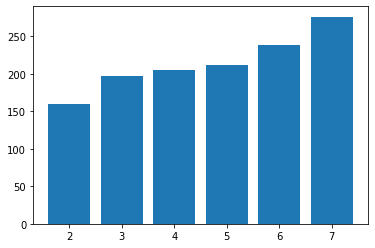

In [27]:
#строим график зависимости среднего времени работы в месяц сотрудников от количества проектов у сотрудника
# убеждаемся в логической закономерности - чем больше проектов, тем больше среднее время работы в месяц. 
#зависимость линейная.
y=df3
x=df3.index
plt.bar(x,y)

Коэффициент корреляции Пирсона: 0.4172106344017771


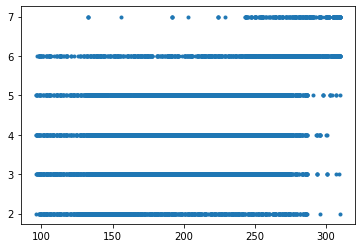

In [28]:
from scipy.stats import pearsonr
x=df['average_montly_hours']
y=df['number_project']
corr, p_value = pearsonr(df['average_montly_hours'], df['number_project'])
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)
#знак коэффициента корреляции Пирсона (положительный) говорит о том что есть положительная зависимость 
#(прямая корреляция)значений - при росте значения числа проектов у сотрудника растет среднее время в месяц 

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

сравним последние оценки компанией (last_evaluation) у уволенных и работающих сотрудников

In [50]:
left_0 = df[df['left']==0]['last_evaluation']

left_1 = df[df['left']==1]['last_evaluation']

print(stats.ttest_ind(left_0, left_1))

Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)


вывод: pvalue=0.421>0.05 и показывает отсутствие статистического различия между уволенными и работающими сотрудниками из-за (по параметру) оценок выставляемых компанией сотруднику. Оценка не характеризует причину увольнения сотрудника.

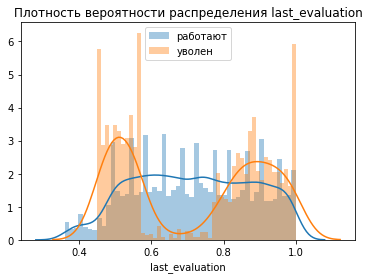

In [51]:
sns.distplot(left_0, 50)
sns.distplot(left_1, 50)
plt.title('Плотность вероятности распределения last_evaluation')
plt.legend(['работают', 'уволен'])
plt.show()

на основании графика можно выдвинуть предположение, что сотрудники с низкими оценками
были уволены или уволнялись сами по причине сложности работы, а сотрудники с высокими оценками уволнялись сами 
(в поисках роста) низкая текучисть кадров у сотрудников со  средними оценками 

Проверим гипотезу что уровень заработной платы не влияет на увольнения сотрудников. 
Посмотрим уровень заработной платы у уволившихся и работающих сотрудников

In [52]:
salary_0 = df[df['left']==0]['new_salary']

salary_1 = df[df['left']==1]['new_salary']

print(stats.ttest_ind(salary_0, salary_1))

Ttest_indResult(statistic=19.58216626170969, pvalue=2.475238171818194e-84)


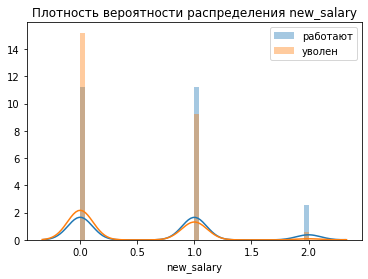

In [53]:
sns.distplot(salary_0, 50)
sns.distplot(salary_1, 50)
plt.title('Плотность вероятности распределения new_salary')
plt.legend(['работают', 'уволен'])
plt.show()

# Вывод: pvalue<0.05 и показывает статистическую значимость между уволенениями и заработной платой.
# увольняются чаще и больше сотрудники с низкой заработной платой. нулевую гипотезу отвергаем

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

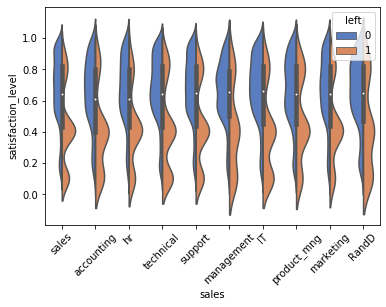

In [61]:
ax = sns.violinplot(x="sales", y="satisfaction_level", hue="left",
                   data=df, palette="muted", split=True)
plt.xticks(rotation=45)

In [76]:
# Влияние на увольнение времени работы в компании
left_0_time = df[df['left']==0]['time_spend_company']

left_1_time = df[df['left']==1]['time_spend_company']

print(stats.ttest_ind(left_0_time, left_1_time))

Ttest_indResult(statistic=-17.924210234916142, pvalue=4.207680457692835e-71)


Вывод: чем дольше сотрудник работает в компании, тем меньше увольнений, зависимость увольнений от стажа работы имеется
pvalue<0.05

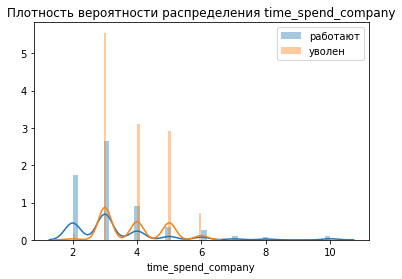

In [77]:
sns.distplot(left_0_time, 50)
sns.distplot(left_1_time, 50)
plt.title('Плотность вероятности распределения time_spend_company')
plt.legend(['работают', 'уволен'])
plt.show()

In [79]:
# влияние на увольнение уроня удовлетворенности

left_0_stlevel = df[df['left']==0]['satisfaction_level']

left_1_stlevel = df[df['left']==1]['satisfaction_level']

print(stats.ttest_ind(left_0_stlevel, left_1_stlevel))

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)


вывод: чем больше уровень удовлетворенности сотрудника, тем меньше увольнений

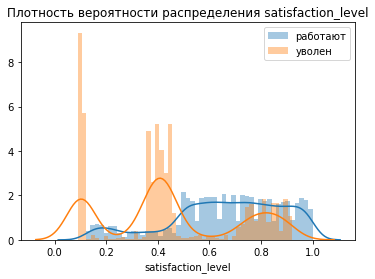

In [80]:
sns.distplot(left_0_stlevel, 50)
sns.distplot(left_1_stlevel, 50)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['работают', 'уволен'])
plt.show()

In [30]:
# влияние на увольнение уроня заработной платы
# 
left_0_salary = df[df['left']==0]['new_salary']

left_1_salary = df[df['left']==1]['new_salary']

print(stats.ttest_ind(left_0_salary, left_1_salary))

Ttest_indResult(statistic=19.58216626170969, pvalue=2.475238171818194e-84)


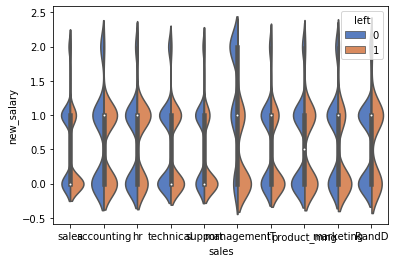

In [57]:
# увольнения в зависимости от уровня заработной платы по отделам
ax = sns.violinplot(x="sales", y="new_salary", hue="left",
                   data=df, palette="muted", split=True)

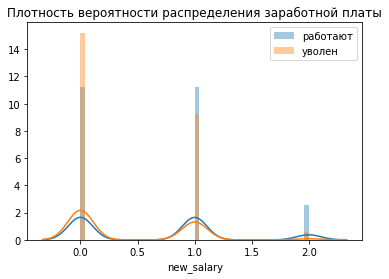

In [32]:
sns.distplot(left_0_salary, 50)
sns.distplot(left_1_salary, 50)
plt.title('Плотность вероятности распределения заработной платы')
plt.legend(['работают', 'уволен'])
plt.show()

вывод: чем выше заработная плата, тем меньше увольнений, больше всего увольняются работники с низкой оплатой труда
(распределение сотрудников по уровню оплаты:
                                           низкая - 7316 сотрудников
                                           средняя - 6446 сотрудников
                                           высокая - 1237 сотрудников)

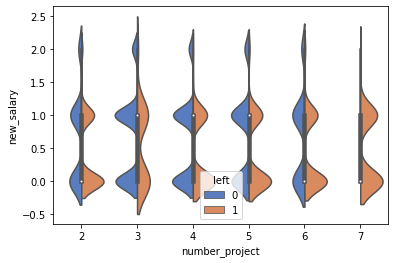

In [58]:
# увольнения в зависимости от количества проектов и уровня заработной платы
ax = sns.violinplot(x="number_project", y="new_salary", hue="left",
                   data=df, palette="muted", split=True)

# Вывод: зависимости увольнений от количества проектов нет

6.Рассчитать сколько работников работает в каждом департаменте.


In [44]:
df['sales'].value_counts().head(10)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Посмотрим количество увольнений по отделам (департаментам), %

In [46]:
sales_left=((df[df['left']==1]['sales'].value_counts())/(df['sales'].value_counts()))*100
sales_left


IT             22.249389
RandD          15.374841
accounting     26.597132
hr             29.093369
management     14.444444
marketing      23.659674
product_mng    21.951220
sales          24.492754
support        24.899058
technical      25.625000
Name: sales, dtype: float64

Вывод: гипотеза о увольнении по причине "неадекватного" руководителя/лей отделов не подтверждается
количество уволевшихся приблизительно равномерное по всем отделам

7.Показать распределение сотрудников по зарплатам.

In [92]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [95]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [60]:
df.groupby(['sales','salary']).count()['left'].head(100)

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: left, dtype: int64

9.Сколько сотрудников покинули компанию.


In [111]:
df[df['left']==1].count()

satisfaction_level       3571
last_evaluation          3571
number_project           3571
average_montly_hours     3571
time_spend_company       3571
Work_accident            3571
left                     3571
promotion_last_5years    3571
sales                    3571
salary                   3571
salary_new               3571
dtype: int64

In [67]:
# количество уволившихся сотрудников по отделам  и по уровню заработной платы
df.groupby(['sales','salary','left']).count().head()

satisfaction_level  last_evaluation  number_project  \
sales salary left                                                        
IT    high   0                     79               79              79   
             1                      4                4               4   
      low    0                    437              437             437   
             1                    172              172             172   
      medium 0                    438              438             438   

                   average_montly_hours  time_spend_company  Work_accident  \
sales salary left                                                            
IT    high   0                       79                  79             79   
             1                        4                   4              4   
      low    0                      437                 437            437   
             1                      172                 172            172   
      medium 0                      438                 438            438   

                   promotion_last_5years  new_salary  
sales salary left                                     
IT    high   0                        79          79  
             1                         4           4  
      low    0                       437         437  
             1                       172         172  
      medium 0                       438         438

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

1. H0 - чем меньше уровень удовлетворенности, тем больше увольнений
2. Н0 - уровень заработной платы не зависит от количества выполняемых проектов - увольнений больше
3. чем больше заработная плата , тем меньше увольнений
4. наличие повышений за последние 5 лет не влияет на увольнение
5. Я думаю, что здесь нужно подойти статистически к решению вопроса.
Допустим, можно разделить всех сотрудников на 3 группы (или две, или больше чем 3), взять их отделы и посмотреть, представители какого отдела чаще встречаются в каждой из групп.
Или можно взять разделённые на группы сотрудников и посмотреть на средний стаж в каждой из групп
Или на кол-во проектов среднее в каждой группе
И так далее в таком же духе

Во-первых, необходимо убедиться, что данные распределены нормально в наших случайных выборках, во-вторых, нужно убедиться, что дисперсии двух выборок(если мы проверяем две не взаимосвязанные переменные) одинаковы или отличаются минимально и только после этого мы можем провести t-test

H0 - наличие повышений за последние 5 лет не влияет на увольнение

Выводы:
1. Исследования выявили зависимости между уволнением, заработной платой, последними оценками, уровня удовлетворенности и стажа работы в компании. Основной причиной увольнений является низкая заработная плата. Чем выше уровень удовлетворенности и стаж работы, тем меньше увольнений

2. Исследования оценок показали что сотрудники с низкими оценками были уволены или уволнялись сами по причине сложности работы, а сотрудники с высокими оценками уволнялись сами (в поисках роста) низкая текучисть кадров у сотрудников со  средними оценками 

3. Проверена гипотеза причины увольнений из-за "неадекватного руководителя" отдела. Все увольнения не связаны с данной гипотезой. Неоднородностей (выбросов) в разрезе отделов по уволившимся сотрудникам не выявлено. Процент увольнений по отделам примерно одинаковый

4. установлено, что количество проектов на сотрудника не является причиной увольнений

Рекомендации:
1. Пересмотреть систему не материальной мотивации с точки зрения повышения уровня удовлетворенности сотрудников работой в Компании

2. Разработать программу повышения квалификации, наставничества для сотрудников с низкими последними оценками с целью смещения большего количества сотрудников в область средних оценок.

3. Разработать мероприятия по карьерному росту сотрудников с высокими оценками

4. Пересмотреть систему примирования сотрудников, предоставив им возможность повышать свой уровень заработной платы за счет новых компетенций, лучших оценок